In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,layers
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
df=pd.read_csv('agnews.csv')

In [5]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
df=df.sample(frac=1).reset_index(drop=True)

In [7]:
df.head()

,Class Index,Title,Description
0,3,6 Reasons to Love Rambus,The company's revenue and earnings are just tw...
1,3,Dollar Ignores Data and Tumbles,NEW YORK (Reuters) - The dollar tumbled again...
2,4,"California urged to use open source, VoIP",Authors of a performance review tell the belea...
3,3,FTSE 100 dips after bank holiday break,The FTSE 100 has dipped on its return from a t...
4,4,Museum to Get \$60 Million Exhibit,The Smithsonian #39;s National Museum of Natur...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [9]:
df=df[0:10000]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  10000 non-null  int64 
 1   Title        10000 non-null  object
 2   Description  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [11]:
df.isna().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [16]:
for i in range(15):
    print(df['Class Index'][i],'------',df['Description'][i])
    print()

3 ------ The company's revenue and earnings are just two reasons to like this stock.

3 ------  NEW YORK (Reuters) - The dollar tumbled against the euro on  Wednesday, as traders shrugged off the surge in U.S. consumer  prices in October and focused more on the upcoming G20 finance  minister's meeting in Berlin starting from Friday.

4 ------ Authors of a performance review tell the beleaguered state government it could save millions of dollars by adopting open-source software and Internet-based phone calling.

3 ------ The FTSE 100 has dipped on its return from a three-day break after a slide on Wall Street, but power companies have risen after a multi-billion-pound asset sale by National Grid Transco.

4 ------ The Smithsonian #39;s National Museum of Natural History plans to announce today the largest renovation in its nearly 95-year history, creating Ocean Hall, an unusual hybrid of public display and research.

1 ------ Jakarta (VNA) - Indonesia #39;s two presidential candidates p

In [17]:
df.duplicated().sum()

0

In [20]:
df.describe(include='all')

,Class Index,Title,Description
count,10000.000000,10000,10000
unique,NaN,9936,9988
top,NaN,Enter your e-mail:,Mortgage rates are at record lows. Save \$1000...
freq,NaN,6,2
mean,2.501700,NaN,NaN
std,1.113966,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,3.000000,NaN,NaN


<AxesSubplot:xlabel='count', ylabel='Class Index'>

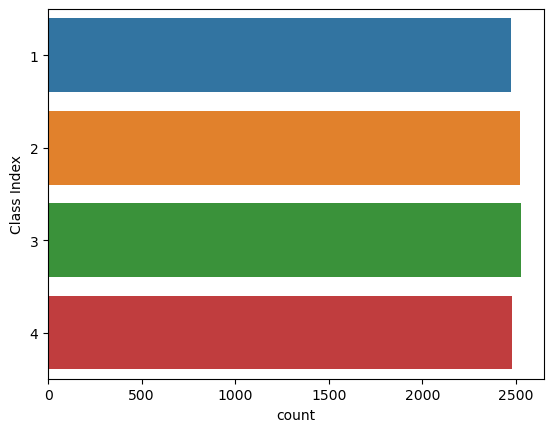

In [21]:
sns.countplot(data=df,y='Class Index')

In [22]:
def preprocessing(sentennce):
    text=re.sub(r'[^0-9A-Za-z]',' ',sentennce).split()
    
    words=[i.lower() for i in text if i not in stopwords.words('english')]
    
    lemma=WordNetLemmatizer()
    word=[lemma.lemmatize(i,'v') for i in words]
    
    return ' '.join(word)

In [23]:
df['Description']=df['Description'].apply(preprocessing)

In [24]:
for i in range(15):
    print(df['Class Index'][i],'------',df['Description'][i])
    print()

3 ------ the company revenue earn two reason like stock

3 ------ new york reuters the dollar tumble euro wednesday traders shrug surge u s consumer price october focus upcoming g20 finance minister meet berlin start friday

4 ------ author performance review tell beleaguer state government could save millions dollars adopt open source software internet base phone call

3 ------ the ftse 100 dip return three day break slide wall street power company rise multi billion pound asset sale national grid transco

4 ------ the smithsonian 39 national museum natural history plan announce today largest renovation nearly 95 year history create ocean hall unusual hybrid public display research

1 ------ jakarta vna indonesia 39 two presidential candidates pledge restore economy improve infrastructure reduce unemployment rate focus development industry agriculture technology education equal development localities

4 ------ hollywood must embrace digital technologies also fight film piracy say new 

In [25]:
x=df['Description']
y=df['Class Index']

In [26]:
encoder=LabelBinarizer()

In [27]:
y=encoder.fit_transform(y)

In [28]:
y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [29]:
tokenizer=Tokenizer(num_words=5000)

In [30]:
tokenizer.fit_on_texts(x)

In [31]:
tokenizer.word_index

{'39': 1,
 'say': 2,
 'the': 3,
 'new': 4,
 'reuters': 5,
 'a': 6,
 'company': 7,
 'us': 8,
 'two': 9,
 'year': 10,
 'gt': 11,
 'lt': 12,
 'first': 13,
 'quot': 14,
 'ap': 15,
 'monday': 16,
 'wednesday': 17,
 'world': 18,
 'friday': 19,
 'tuesday': 20,
 'thursday': 21,
 'inc': 22,
 'report': 23,
 'game': 24,
 'one': 25,
 'u': 26,
 '1': 27,
 'yesterday': 28,
 'state': 29,
 'york': 30,
 's': 31,
 'time': 32,
 'make': 33,
 '2': 34,
 'last': 35,
 'price': 36,
 'plan': 37,
 'take': 38,
 'oil': 39,
 'three': 40,
 'president': 41,
 'week': 42,
 'stock': 43,
 'sunday': 44,
 'million': 45,
 'corp': 46,
 'people': 47,
 'lead': 48,
 'team': 49,
 'would': 50,
 'unite': 51,
 'today': 52,
 'service': 53,
 'group': 54,
 'government': 55,
 'n': 56,
 'kill': 57,
 'second': 58,
 'could': 59,
 'win': 60,
 'market': 61,
 'run': 62,
 'season': 63,
 'announce': 64,
 'com': 65,
 'percent': 66,
 'day': 67,
 'iraq': 68,
 'software': 69,
 'saturday': 70,
 'third': 71,
 'years': 72,
 'use': 73,
 'fullquote': 74

In [32]:
vocab_size=len(tokenizer.word_index)+1

In [33]:
def text_encoding(txt):
    encoded_txt=tokenizer.texts_to_sequences(txt)
    
    padded=pad_sequences(encoded_txt,maxlen=128)
    
    return padded

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
x_train=text_encoding(x_train)
x_test=text_encoding(x_test)

In [36]:
model=Sequential([
    layers.Embedding(vocab_size,128),
    
    layers.GRU(128,return_sequences=True),
    layers.Dropout(0.2),
    layers.GRU(128),
    layers.Dropout(0.2),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(4,activation='softmax')
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2419840   
                                                                 
 gru (GRU)                   (None, None, 128)         99072     
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
238/238 [==============================] - 104s 408ms/step - loss: 0.7764 - accuracy: 0.6772 - val_loss: 0.3952 - val_accuracy: 0.8825
Epoch 2/10
238/238 [==============================] - 100s 421ms/step - loss: 0.3093 - accuracy: 0.8996 - val_loss: 0.3570 - val_accuracy: 0.8775
Epoch 3/10
238/238 [==============================] - 98s 410ms/step - loss: 0.1833 - accuracy: 0.9436 - val_loss: 0.4506 - val_accuracy: 0.8600
Epoch 4/10
238/238 [==============================] - 93s 392ms/step - loss: 0.1204 - accuracy: 0.9617 - val_loss: 0.5278 - val_accuracy: 0.8500
Epoch 5/10
238/238 [==============================] - 96s 402ms/step - loss: 0.0854 - accuracy: 0.9763 - val_loss: 0.5735 - val_accuracy: 0.8625
Epoch 6/10
238/238 [==============================] - 97s 409ms/step - loss: 0.0649 - accuracy: 0.9792 - val_loss: 0.6512 - val_accuracy: 0.8300
Epoch 7/10
238/238 [==============================] - 97s 407ms/step - loss: 0.0523 - accuracy: 0.9853 - val_loss: 0.7137 - val_

In [40]:
y_pred=model.predict(x_test)

63/63 [==============================] - 9s 116ms/step


In [41]:
y_pred

array([[9.5961654e-01, 4.6869665e-03, 3.5467014e-02, 2.2948632e-04],
       [8.0679024e-07, 9.9998355e-01, 1.5673506e-05, 9.0464072e-09],
       [1.3438710e-05, 6.2152822e-07, 9.9920660e-01, 7.7937037e-04],
       ...,
       [7.8061118e-04, 9.9917042e-01, 4.8646565e-05, 3.4512260e-07],
       [2.7935707e-04, 5.4110409e-05, 9.9200588e-01, 7.6607270e-03],
       [6.2377852e-01, 1.0026548e-01, 1.4644060e-01, 1.2951538e-01]],
      dtype=float32)

In [42]:
predicted=[np.argmax(i) for i in y_pred]

In [43]:
y_test=[np.argmax(i) for i in y_test]

In [46]:
accuracy_score(y_test,predicted)

0.8135

<AxesSubplot:>

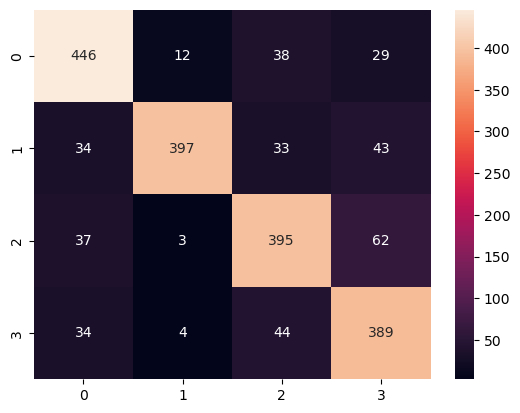

In [47]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [48]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       525
           1       0.95      0.78      0.86       507
           2       0.77      0.79      0.78       497
           3       0.74      0.83      0.78       471

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000

